In [1]:
import math
import meep as mp
from meep import mpb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/DAVID/anaconda3/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/Users/DAVID/anaconda3/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
num_bands = 5
k_points = [mp.Vector3(),         # Gamma
            mp.Vector3(y = 0.5),   # M
            mp.Vector3(-1/3, 1/3), # K
            mp.Vector3()]         # Gamma
k_points = mp.interpolate(10, k_points)

# EXAMPLE DIAGRAM

In [3]:
r_example = 0.44

geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))
resolution = 32 # pixels/lattice-unit
geometry = [mp.Cylinder(radius=r_example, material=mp.air, height=mp.inf, axis=mp.Vector3(0,0,1))]
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=mp.Medium(epsilon=11.4)
)
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list
TE = pd.DataFrame(ms.all_freqs) 
#TE_gaps = ms.gap_list
TE_gaps = [ms.retrieve_gap(i) for i in range(1,num_bands)] # Los gaps en las bandas -1, 0, 1, 2, 3, 4,...num_bands as a midfrequency ratio percentage
TE_max_val = TE.max().max()
ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
TM = pd.DataFrame(ms.all_freqs)
#TM_gaps = ms.gap_list
TM_gaps = [ms.retrieve_gap(i) for i in range(1,num_bands)]
TM_max_val = TM.max().max()

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.44, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 3 and 16 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: te.
Initializing fields to random numbers...
34 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.045454545454545456, 0.0>
  Vector3<0.0, 0.09090909090909091, 0.0>
  Vector3<0.0, 0.13636363636363635, 0.0>
  Vector3<0.0, 0.18181818181818182, 0.0>
  Vector3<0.0, 0.2272727272727273, 0.0>
  Vector3<0.0, 0.2727272727272727, 0.0>
  Vector3<0.0, 

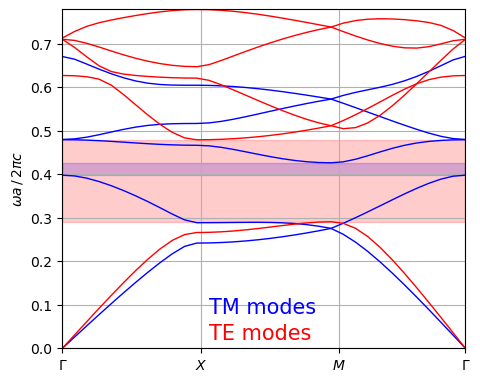

In [4]:
fig, ax = plt.subplots(figsize=(6.5*0.8,5.5*0.8))
x = range(len(tm_freqs))
# Graficar TM en el eje especificado
TM.plot.line(ax=ax, color="blue", linestyle='-', linewidth=1, grid=True, legend = False,
             xlim=(0, TM.shape[0]-1), ylim=(0,np.maximum(TE_max_val,TE_max_val)))

# Graficar TE en el mismo eje
TE.plot.line(ax=ax, color="red", linestyle='-', linewidth=1, grid = True, legend = False)

# Añadir título y etiquetas
#ax.set_title("TM and TE Modes")

ax.set_ylabel(r"$\omega a\,/\,2\pi c}$")  # Reemplaza con la etiqueta deseada para el eje y

ax.set_xticks([0, TM.shape[0]/3, 2*TM.shape[0]/3, TM.shape[0]-1], [r"$\Gamma$", r"$X$", r"$M$", r"$\Gamma$"]) 
#ax.set_xticks(np.arange(4), [r"$\Gamma$", r"$X$", r"$\Lambda$", r"$\Gamma$"])  

for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)
for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)

# Labels
ax.text(12, 0.08, 'TM modes', color='blue', size=15)
ax.text(12, 0.02, 'TE modes', color='red', size=15)

#plt.legend()

plt.show()

In [5]:
te_gaps,tm_gaps

([(48.919047230975316, 0.29091089640574413, 0.4793010755838528)],
 [(0.04468328721142161, 0.27555485236358807, 0.2756780068444299),
  (6.90136985262945, 0.3980251737972655, 0.42647611550447106),
  (0.12390036904440109, 0.4795310950605852, 0.4801256041565299),
  (0.002249395128548941, 0.5729052928185219, 0.57291817986721)])

# Optimizing TE mode

In [6]:
r_TE_optimized = 0.4234456712032516

geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))
resolution = 32 # pixels/lattice-unit
geometry = [mp.Cylinder(radius=r_TE_optimized, material=mp.air, height=mp.inf, axis=mp.Vector3(0,0,1))]
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=mp.Medium(epsilon=11.4)
)
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list
TE = pd.DataFrame(ms.all_freqs) 
#TE_gaps = ms.gap_list
TE_gaps = [ms.retrieve_gap(i) for i in range(1,num_bands)] # Los gaps en las bandas -1, 0, 1, 2, 3, 4,...num_bands as a midfrequency ratio percentage
TE_max_val = TE.max().max()
ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
TM = pd.DataFrame(ms.all_freqs)
#TM_gaps = ms.gap_list
TM_gaps = [ms.retrieve_gap(i) for i in range(1,num_bands)]
TM_max_val = TM.max().max()

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.423446, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 3 and 9 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: te.
Initializing fields to random numbers...
34 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.045454545454545456, 0.0>
  Vector3<0.0, 0.09090909090909091, 0.0>
  Vector3<0.0, 0.13636363636363635, 0.0>
  Vector3<0.0, 0.18181818181818182, 0.0>
  Vector3<0.0, 0.2272727272727273, 0.0>
  Vector3<0.0, 0.2727272727272727, 0.0>
  Vector3<0.

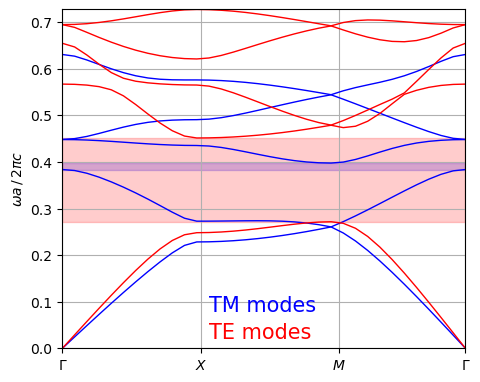

In [7]:
fig, ax = plt.subplots(figsize=(6.5*0.8,5.5*0.8))
x = range(len(tm_freqs))
# Graficar TM en el eje especificado
TM.plot.line(ax=ax, color="blue", linestyle='-', linewidth=1, grid=True, legend = False,
             xlim=(0, TM.shape[0]-1), ylim=(0,np.maximum(TE_max_val,TE_max_val)))

# Graficar TE en el mismo eje
TE.plot.line(ax=ax, color="red", linestyle='-', linewidth=1, grid = True, legend = False)

# Añadir título y etiquetas
#ax.set_title("TM and TE Modes")

ax.set_ylabel(r"$\omega a\,/\,2\pi c}$")  # Reemplaza con la etiqueta deseada para el eje y

ax.set_xticks([0, TM.shape[0]/3, 2*TM.shape[0]/3, TM.shape[0]-1], [r"$\Gamma$", r"$X$", r"$M$", r"$\Gamma$"]) 
#ax.set_xticks(np.arange(4), [r"$\Gamma$", r"$X$", r"$\Lambda$", r"$\Gamma$"])  

for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)
for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)

# Labels
ax.text(12, 0.08, 'TM modes', color='blue', size=15)
ax.text(12, 0.02, 'TE modes', color='red', size=15)

#plt.legend()

plt.show()

In [8]:
TE_gaps, TM_gaps 

([0.024151045600863078,
  3.553977100108228,
  0.05852049561328532,
  0.03525947604879443],
 [49.742779661629285,
  -16.821323109416205,
  -5.2631281755938195,
  -0.3714783293892407])

In [ ]:
freq_min = 0.
freq_max = 0.5438570375634321

complete_gap = freq_max - freq_min

freq_midgap = freq_min + 0.5*(freq_max-freq_min)

midgap_ratio = complete_gap / freq_midgap * 100

complete_gap, freq_midgap, midgap_ratio

(0.052051401123054175, 0.517831337001905, 10.051805946008766)

In [ ]:
lbda = 1.5 # micrometers
a = freq_midgap * lbda
a

0.7767470055028575

# Optimizing TM mode

In [34]:
r_TM_optimized = 0.49589955083911397

geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))
resolution = 32 # pixels/lattice-unit
geometry = [mp.Cylinder(radius=r_TM_optimized, material=mp.air, height=mp.inf, axis=mp.Vector3(0,0,1))]
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=mp.Medium(epsilon=11.4)
)
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list
TE = pd.DataFrame(ms.all_freqs) 
#TE_gaps = ms.gap_list
TE_gaps = [ms.retrieve_gap(i) for i in range(1,num_bands)] # Los gaps en las bandas -1, 0, 1, 2, 3, 4,...num_bands as a midfrequency ratio percentage
TE_max_val = TE.max().max()
ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
TM = pd.DataFrame(ms.all_freqs)
#TM_gaps = ms.gap_list
TM_gaps = [ms.retrieve_gap(i) for i in range(1,num_bands)]
TM_max_val = TM.max().max()

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.4959, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 3 and 16 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: te.
Initializing fields to random numbers...
34 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.045454545454545456, 0.0>
  Vector3<0.0, 0.09090909090909091, 0.0>
  Vector3<0.0, 0.13636363636363635, 0.0>
  Vector3<0.0, 0.18181818181818182, 0.0>
  Vector3<0.0, 0.2272727272727273, 0.0>
  Vector3<0.0, 0.2727272727272727, 0.0>
  Vector3<0.0

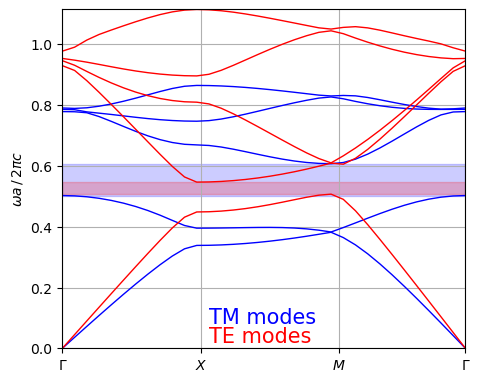

In [35]:
fig, ax = plt.subplots(figsize=(6.5*0.8,5.5*0.8))
x = range(len(tm_freqs))
# Graficar TM en el eje especificado
TM.plot.line(ax=ax, color="blue", linestyle='-', linewidth=1, grid=True, legend = False,
             xlim=(0, TM.shape[0]-1), ylim=(0,np.maximum(TE_max_val,TE_max_val)))

# Graficar TE en el mismo eje
TE.plot.line(ax=ax, color="red", linestyle='-', linewidth=1, grid = True, legend = False)

# Añadir título y etiquetas
#ax.set_title("TM and TE Modes")

ax.set_ylabel(r"$\omega a\,/\,2\pi c}$")  # Reemplaza con la etiqueta deseada para el eje y

ax.set_xticks([0, TM.shape[0]/3, 2*TM.shape[0]/3, TM.shape[0]-1], [r"$\Gamma$", r"$X$", r"$M$", r"$\Gamma$"]) 
#ax.set_xticks(np.arange(4), [r"$\Gamma$", r"$X$", r"$\Lambda$", r"$\Gamma$"])  

for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)
for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)

# Labels
ax.text(12, 0.08, 'TM modes', color='blue', size=15)
ax.text(12, 0.02, 'TE modes', color='red', size=15)

#plt.legend()

plt.show()

In [36]:
te_gaps, tm_gaps

([(7.52467340813465, 0.507253494730477, 0.5469148575718076)],
 [(0.24329970430099307, 0.38181126290654593, 0.38274134001761595),
  (18.888448446570017, 0.5026760065760856, 0.6075259706352695)])

In [ ]:
freq_min = 0.
freq_max = 0.5438570375634321

complete_gap = freq_max - freq_min

freq_midgap = freq_min + 0.5*(freq_max-freq_min)

midgap_ratio = complete_gap / freq_midgap * 100

complete_gap, freq_midgap, midgap_ratio

(0.052051401123054175, 0.517831337001905, 10.051805946008766)

In [ ]:
lbda = 1.5 # micrometers
a = freq_midgap * lbda
a

0.7767470055028575

# Optimizing TE and TM MODES

In [17]:
r_optimized = 0.4925654817487522

geometry_lattice = mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(math.sqrt(3) / 2, 0.5),
                              basis2=mp.Vector3(math.sqrt(3) / 2, -0.5))
resolution = 32 # pixels/lattice-unit
geometry = [mp.Cylinder(radius=r_optimized, material=mp.air, height=mp.inf, axis=mp.Vector3(0,0,1))]
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution,
                    default_material=mp.Medium(epsilon=11.4)
)
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list
TE = pd.DataFrame(ms.all_freqs) 
#TE_gaps = ms.gap_list
TE_gaps = [ms.retrieve_gap(i) for i in range(1,num_bands)] # Los gaps en las bandas -1, 0, 1, 2, 3, 4,...num_bands as a midfrequency ratio percentage
TE_max_val = TE.max().max()
ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list
TM = pd.DataFrame(ms.all_freqs)
#TM_gaps = ms.gap_list
TM_gaps = [ms.retrieve_gap(i) for i in range(1,num_bands)]
TM_max_val = TM.max().max()

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.


Grid size is 32 x 32 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.866025, 0.5, 0)
     (0.866025, -0.5, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (0.57735, 1, -0)
     (0.57735, -1, 0)
     (-0, 0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.492565, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 3 and 16 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: te.
Initializing fields to random numbers...
34 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.0, 0.045454545454545456, 0.0>
  Vector3<0.0, 0.09090909090909091, 0.0>
  Vector3<0.0, 0.13636363636363635, 0.0>
  Vector3<0.0, 0.18181818181818182, 0.0>
  Vector3<0.0, 0.2272727272727273, 0.0>
  Vector3<0.0, 0.2727272727272727, 0.0>
  Vector3<0.0, 0.3181818181818182, 0.0>
  Vector3<0.0, 0.36363636363636365, 0.0>
  Vector3<0.0, 0.4090909

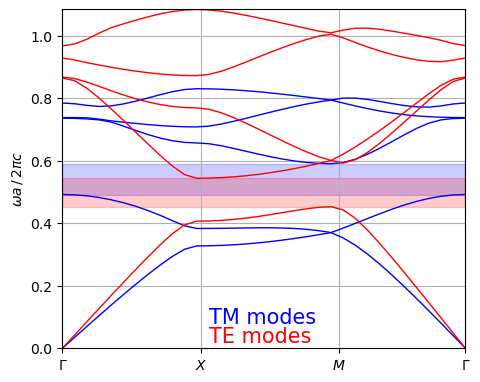

In [18]:
fig, ax = plt.subplots(figsize=(6.5*0.8,5.5*0.8))
x = range(len(tm_freqs))
# Graficar TM en el eje especificado
TM.plot.line(ax=ax, color="blue", linestyle='-', linewidth=1, grid=True, legend = False,
             xlim=(0, TM.shape[0]-1), ylim=(0,np.maximum(TE_max_val,TE_max_val)))

# Graficar TE en el mismo eje
TE.plot.line(ax=ax, color="red", linestyle='-', linewidth=1, grid = True, legend = False)

# Añadir título y etiquetas
#ax.set_title("TM and TE Modes")

ax.set_ylabel(r"$\omega a\,/\,2\pi c}$")  # Reemplaza con la etiqueta deseada para el eje y

ax.set_xticks([0, TM.shape[0]/3, 2*TM.shape[0]/3, TM.shape[0]-1], [r"$\Gamma$", r"$X$", r"$M$", r"$\Gamma$"]) 
#ax.set_xticks(np.arange(4), [r"$\Gamma$", r"$X$", r"$\Lambda$", r"$\Gamma$"])  

for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)
for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)

# Labels
ax.text(12, 0.08, 'TM modes', color='blue', size=15)
ax.text(12, 0.02, 'TE modes', color='red', size=15)

#plt.legend()

plt.show()

In [19]:
TE_gaps, TM_gaps 

([18.256099870269672,
  -36.02961951386969,
  0.49526802182582047,
  -3.7904899615999548],
 [0.046164431264090755,
  18.22540479552732,
  -3.849669715621856,
  -2.879561764479187])

In [21]:
te_gaps, tm_gaps

([(18.256099870269672, 0.45287485288397894, 0.5438570375634321),
  (0.4952680218258204, 0.867672622551826, 0.8719805955918908)],
 [(0.046164431264090755, 0.36996764833769064, 0.37013848123042353),
  (18.22540479552732, 0.4918056364403779, 0.590426203244724)])

In [28]:
freq_min = 0.4918056364403779
freq_max = 0.5438570375634321

complete_gap = freq_max - freq_min

freq_midgap = freq_min + 0.5*(freq_max-freq_min)

midgap_ratio = complete_gap / freq_midgap * 100

complete_gap, freq_midgap, midgap_ratio

(0.052051401123054175, 0.517831337001905, 10.051805946008766)

In [29]:
lbda = 1.5 # micrometers
a = freq_midgap * lbda
a

0.7767470055028575

In [32]:
r_experimental = r_optimized * a
r_experimental

0.3825987629624157